In [1]:
import os
os.chdir('..')

In [2]:
from tensorflow.python.summary.summary_iterator import summary_iterator
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("seaborn-darkgrid")
def get_from_logfile(path, tags):
    returns = np.empty((100000,len(tags)))
    returns[:] = np.nan
    it = 0

    for ev, event in enumerate(summary_iterator(path)):
        for value in event.summary.value:
            if value.tag in tags:
                idx = tags.index(value.tag)
                returns[it, idx] = value.simple_value
                if idx == 0 and ev!=0:
                    it += 1

    return pd.DataFrame(returns, columns = tags).dropna()

# Problem 1

## First sub-part

In [3]:
root = os.path.join(os.getcwd(), "data")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if ("q1_env" in path and "events" in name)]

In [4]:
files

['c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q1_env1_random_PointmassEasy-v0_14-11-2022_05-44-27\\events.out.tfevents.1668404667.9d1e5d22fbc5',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q1_env1_rnd_PointmassEasy-v0_14-11-2022_05-16-14\\events.out.tfevents.1668402974.9d1e5d22fbc5',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q1_env2_random_PointmassMedium-v0_14-11-2022_06-28-06\\events.out.tfevents.1668407286.9d1e5d22fbc5',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q1_env2_rnd_PointmassMedium-v0_14-11-2022_06-08-31\\events.out.tfevents.1668406111.9d1e5d22fbc5']

In [5]:
random_easy = get_from_logfile(files[0], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
rnd_easy = get_from_logfile(files[1], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
random_medium = get_from_logfile(files[2], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
rnd_medium = get_from_logfile(files[3], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
random_easy.set_index("Train_EnvstepsSoFar", inplace=True)
rnd_easy.set_index("Train_EnvstepsSoFar", inplace=True)
random_medium.set_index("Train_EnvstepsSoFar", inplace=True)
rnd_medium.set_index("Train_EnvstepsSoFar", inplace=True)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


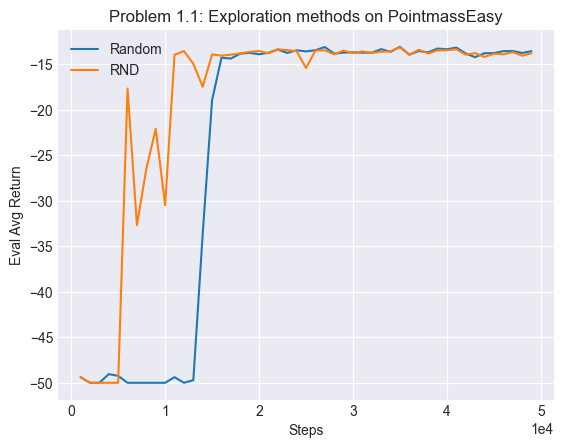

In [6]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(random_easy, label="Random")
plt.plot(rnd_easy, label="RND")
plt.legend()
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("Problem 1.1: Exploration methods on PointmassEasy");
plt.savefig("report/q1_1_easy.jpg", dpi=600)

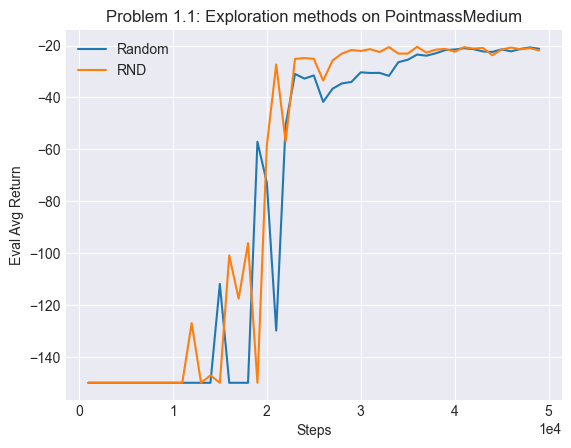

In [7]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(random_medium, label="Random")
plt.plot(rnd_medium, label="RND")
plt.legend()
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("Problem 1.1: Exploration methods on PointmassMedium");
plt.savefig("report/q1_1_medium.jpg", dpi=600)

## Second sub.part

In [8]:
root = os.path.join(os.getcwd(), "data")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if ("q1_alg" in path and "events" in name)]

In [9]:
files

['c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q1_alg_easy_PointmassEasy-v0_18-11-2022_22-50-39\\events.out.tfevents.1668811839.e14d55b5c153',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q1_alg_med_PointmassMedium-v0_18-11-2022_22-35-57\\events.out.tfevents.1668810957.e14d55b5c153']

In [10]:
boltzmann_easy = get_from_logfile(files[0], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
boltzmann_medium = get_from_logfile(files[1], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
boltzmann_easy.set_index("Train_EnvstepsSoFar", inplace=True)
boltzmann_medium.set_index("Train_EnvstepsSoFar", inplace=True)

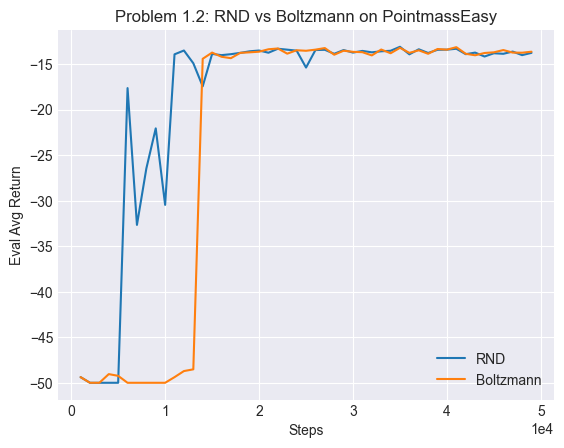

In [11]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(rnd_easy, label="RND")
plt.plot(boltzmann_easy, label="Boltzmann")
plt.legend()
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("Problem 1.2: RND vs Boltzmann on PointmassEasy");
plt.savefig("report/q1_2_easy.jpg", dpi=600)

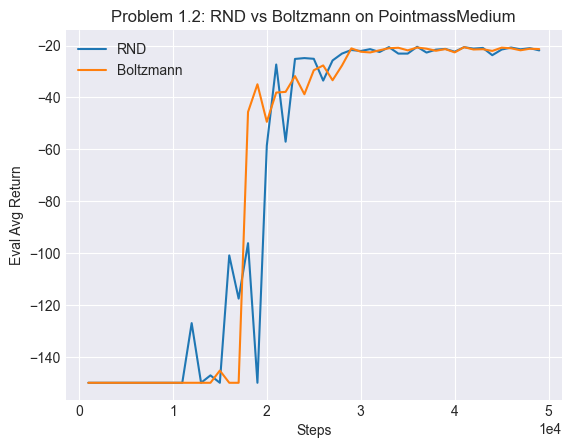

In [12]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(rnd_medium, label="RND")
plt.plot(boltzmann_medium, label="Boltzmann")
plt.legend()
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("Problem 1.2: RND vs Boltzmann on PointmassMedium");
plt.savefig("report/q1_2_medium.jpg", dpi=600)

# Problem 2

In [13]:
root = os.path.join(os.getcwd(), "data")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if ("q2" in path and "events" in name)]

In [14]:
files

['c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q2_alpha0.02_PointmassMedium-v0_15-11-2022_00-26-53\\events.out.tfevents.1668472013.1d1420b1b2f9',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q2_alpha0.5_PointmassMedium-v0_15-11-2022_06-04-57\\events.out.tfevents.1668492297.3d3cdd96f0f9',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q2_cql_numsteps_15000_PointmassMedium-v0_14-11-2022_22-19-41\\events.out.tfevents.1668464381.1d1420b1b2f9',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q2_cql_numsteps_5000_PointmassMedium-v0_14-11-2022_22-08-10\\events.out.tfevents.1668463690.1d1420b1b2f9',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q2_cql_PointmassMedium-v0_14-11-2022_07-29-51\\events.out.tfevents.1668410991.9d1e5d22fbc5',
 'c:\\Users\\Bruger\\Documents\\homework_fall

In [15]:
problem2_3_alpha002 = get_from_logfile(files[0], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
problem2_3_alpha05 = get_from_logfile(files[1], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
problem2_2_cqlnumsteps15000 = get_from_logfile(files[2], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
problem2_2_cqlnumsteps5000 = get_from_logfile(files[3], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
problem2_1_cql = get_from_logfile(files[4], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
problem2_1_shiftscale = get_from_logfile(files[5], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
problem2_2_dqnnumsteps15000 = get_from_logfile(files[6], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
problem2_2_dqnnumsteps5000 = get_from_logfile(files[7], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
problem2_1_dqn = get_from_logfile(files[8], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])

problem2_3_alpha002.set_index("Train_EnvstepsSoFar", inplace=True)
problem2_3_alpha05.set_index("Train_EnvstepsSoFar", inplace=True)
problem2_2_cqlnumsteps15000.set_index("Train_EnvstepsSoFar", inplace=True)
problem2_2_cqlnumsteps5000.set_index("Train_EnvstepsSoFar", inplace=True)
problem2_1_cql.set_index("Train_EnvstepsSoFar", inplace=True)
problem2_1_shiftscale.set_index("Train_EnvstepsSoFar", inplace=True)
problem2_2_dqnnumsteps15000.set_index("Train_EnvstepsSoFar", inplace=True)
problem2_2_dqnnumsteps5000.set_index("Train_EnvstepsSoFar", inplace=True)
problem2_1_dqn.set_index("Train_EnvstepsSoFar", inplace=True)

## Problem 2.1

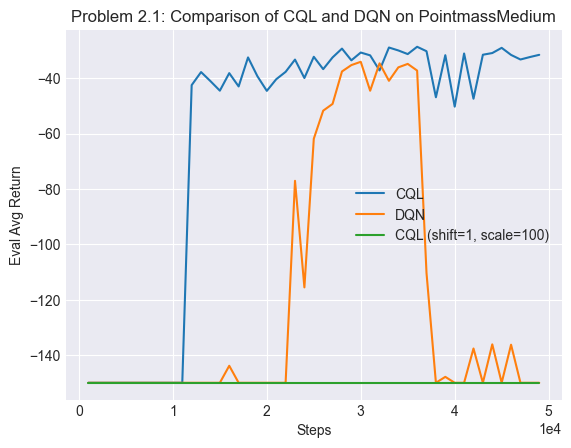

In [16]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(problem2_1_cql, label="CQL")
plt.plot(problem2_1_dqn, label="DQN")
plt.plot(problem2_1_shiftscale, label="CQL (shift=1, scale=100)")
plt.legend()
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("Problem 2.1: Comparison of CQL and DQN on PointmassMedium");
plt.savefig("report/q2_1.jpg", dpi=600)

## Problem 2.2

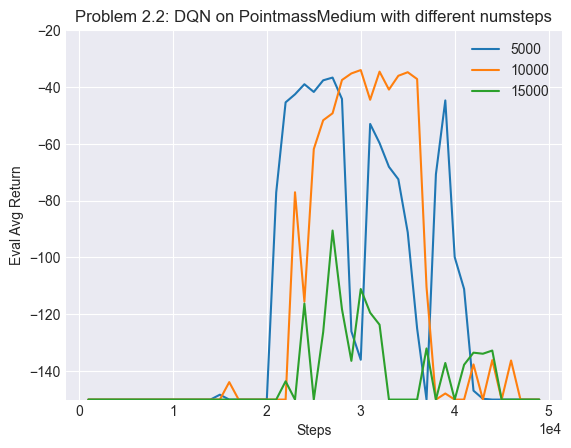

In [17]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(problem2_2_dqnnumsteps5000, label="5000")
plt.plot(problem2_1_dqn, label="10000")
plt.plot(problem2_2_dqnnumsteps15000, label="15000")
plt.legend()
plt.ylim(-150, -20)
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("Problem 2.2: DQN on PointmassMedium with different numsteps");
plt.savefig("report/q2_2_dqn.jpg", dpi=600)

In [18]:
problem2_2_cqlnumsteps15000.max()

Eval_AverageReturn   -23.756098
dtype: float64

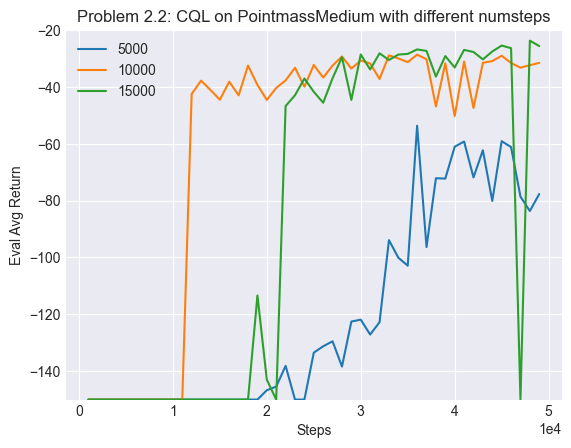

In [19]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(problem2_2_cqlnumsteps5000, label="5000")
plt.plot(problem2_1_cql, label="10000")
plt.plot(problem2_2_cqlnumsteps15000, label="15000")
plt.legend()
plt.ylim(-150, -20)
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("Problem 2.2: CQL on PointmassMedium with different numsteps");
plt.savefig("report/q2_2_cql.jpg", dpi=600)

## Problem 2.3

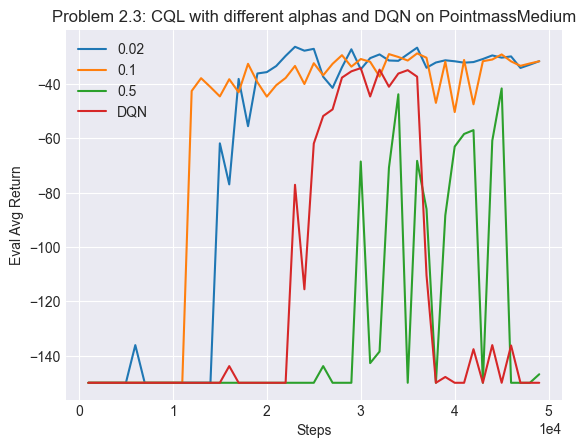

In [20]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.plot(problem2_3_alpha002, label="0.02")
plt.plot(problem2_1_cql, label="0.1")
plt.plot(problem2_3_alpha05, label="0.5")
plt.plot(problem2_1_dqn, label="DQN")
plt.legend()
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("Problem 2.3: CQL with different alphas and DQN on PointmassMedium");
plt.savefig("report/q2_3.jpg", dpi=600)

# Problem 3

In [21]:
root = os.path.join(os.getcwd(), "data")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if ("q3" in path and "events" in name)]

In [22]:
files

['c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q3_hard_cql_PointmassHard-v0_15-11-2022_18-00-22\\events.out.tfevents.1668535222.3cebf9d3a49e',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q3_hard_dqn_PointmassHard-v0_15-11-2022_17-46-01\\events.out.tfevents.1668534361.3cebf9d3a49e',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q3_medium_cql_PointmassMedium-v0_15-11-2022_07-00-41\\events.out.tfevents.1668495641.3d3cdd96f0f9',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q3_medium_dqn_PointmassMedium-v0_15-11-2022_06-34-44\\events.out.tfevents.1668494084.3d3cdd96f0f9']

In [23]:
cql_hard = get_from_logfile(files[0], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
dqn_hard = get_from_logfile(files[1], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
cql_medium = get_from_logfile(files[2], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
dqn_medium = get_from_logfile(files[3], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
cql_hard.set_index("Train_EnvstepsSoFar", inplace=True)
dqn_hard.set_index("Train_EnvstepsSoFar", inplace=True)
cql_medium.set_index("Train_EnvstepsSoFar", inplace=True)
dqn_medium.set_index("Train_EnvstepsSoFar", inplace=True)

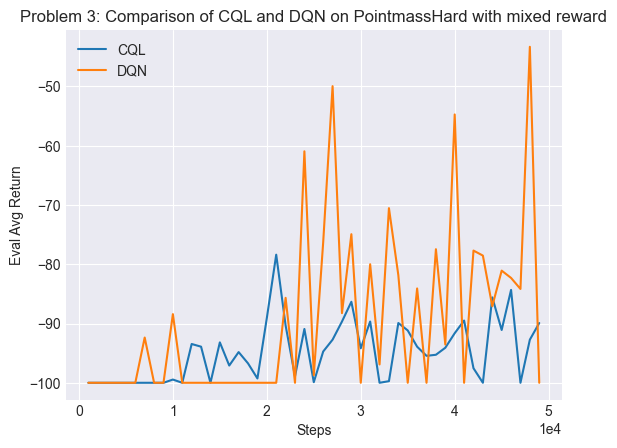

In [24]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(cql_hard, label="CQL")
plt.plot(dqn_hard, label="DQN")
plt.legend()
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("Problem 3: Comparison of CQL and DQN on PointmassHard with mixed reward");
plt.savefig("report/q3_hard.jpg", dpi=600)

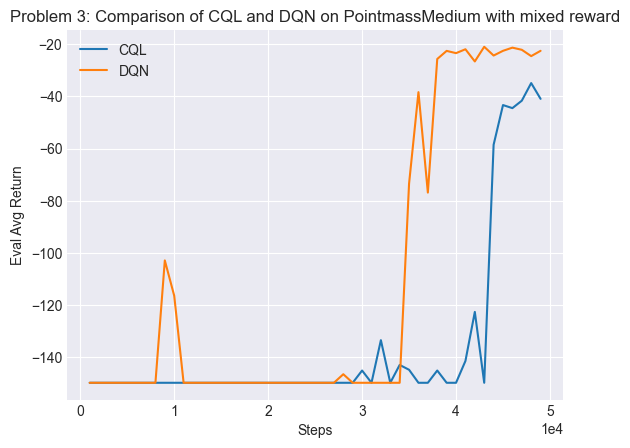

In [25]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(cql_medium, label="CQL")
plt.plot(dqn_medium, label="DQN")
plt.legend()
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("Problem 3: Comparison of CQL and DQN on PointmassMedium with mixed reward");
plt.savefig("report/q3_medium.jpg", dpi=600)

# Problem 4

## Easy and supervised

In [26]:
root = os.path.join(os.getcwd(), "data")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if ("q4_awac_easy_supervised" in path and "events" in name)]

In [27]:
files

['c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_easy_supervised_lam0.1_PointmassEasy-v0_17-11-2022_06-47-45\\events.out.tfevents.1668667665.12137d466644',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_easy_supervised_lam10_PointmassEasy-v0_16-11-2022_17-14-12\\events.out.tfevents.1668618852.e2de39505594',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_easy_supervised_lam1_PointmassEasy-v0_16-11-2022_16-14-41\\events.out.tfevents.1668615281.e2de39505594',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_easy_supervised_lam20_PointmassEasy-v0_16-11-2022_17-42-23\\events.out.tfevents.1668620543.e2de39505594',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_easy_supervised_lam2_PointmassEasy-v0_16-11-2022_16-42-30\\events.out.tfevents.1668616

In [28]:
lam01 = get_from_logfile(files[0], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam10 = get_from_logfile(files[1], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam1 = get_from_logfile(files[2], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam20 = get_from_logfile(files[3], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam2 = get_from_logfile(files[4], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam50 = get_from_logfile(files[5], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam01.set_index("Train_EnvstepsSoFar", inplace=True)
lam10.set_index("Train_EnvstepsSoFar", inplace=True)
lam1.set_index("Train_EnvstepsSoFar", inplace=True)
lam20.set_index("Train_EnvstepsSoFar", inplace=True)
lam2.set_index("Train_EnvstepsSoFar", inplace=True)
lam50.set_index("Train_EnvstepsSoFar", inplace=True)

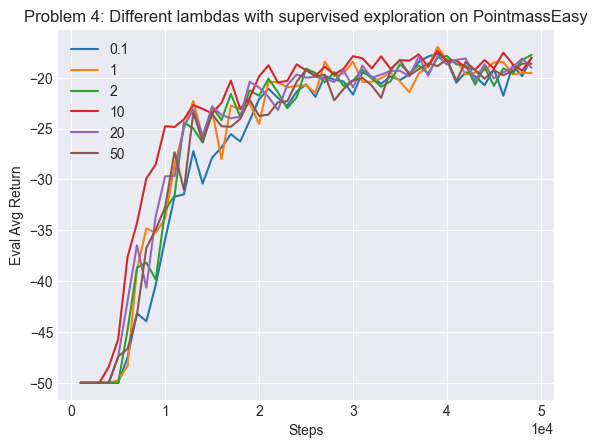

In [29]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(lam01, label="0.1")
plt.plot(lam1, label="1")
plt.plot(lam2, label="2")
plt.plot(lam10, label="10")
plt.plot(lam20, label="20")
plt.plot(lam50, label="50")
plt.legend()
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("Problem 4: Different lambdas with supervised exploration on PointmassEasy");
plt.savefig("report/q4_easy_supervised.jpg", dpi=600)

## Easy and unsupervised

In [30]:
root = os.path.join(os.getcwd(), "data")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if ("q4_awac_easy_unsupervised" in path and "events" in name)]

In [31]:
files

['c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_easy_unsupervised_lam0.1_PointmassEasy-v0_16-11-2022_01-18-15\\events.out.tfevents.1668561495.61bd7eb33b65',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_easy_unsupervised_lam10_PointmassEasy-v0_16-11-2022_06-16-28\\events.out.tfevents.1668579388.10f80bbb37e7',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_easy_unsupervised_lam1_PointmassEasy-v0_16-11-2022_04-14-10\\events.out.tfevents.1668572050.3839c0a0d1a3',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_easy_unsupervised_lam20_PointmassEasy-v0_16-11-2022_06-44-57\\events.out.tfevents.1668581097.10f80bbb37e7',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_easy_unsupervised_lam2_PointmassEasy-v0_16-11-2022_05-34-05\\events.out.tfeven

In [32]:
lam01 = get_from_logfile(files[0], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam10 = get_from_logfile(files[1], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam1 = get_from_logfile(files[2], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam20 = get_from_logfile(files[3], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam2 = get_from_logfile(files[4], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam50 = get_from_logfile(files[5], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam01.set_index("Train_EnvstepsSoFar", inplace=True)
lam10.set_index("Train_EnvstepsSoFar", inplace=True)
lam1.set_index("Train_EnvstepsSoFar", inplace=True)
lam20.set_index("Train_EnvstepsSoFar", inplace=True)
lam2.set_index("Train_EnvstepsSoFar", inplace=True)
lam50.set_index("Train_EnvstepsSoFar", inplace=True)

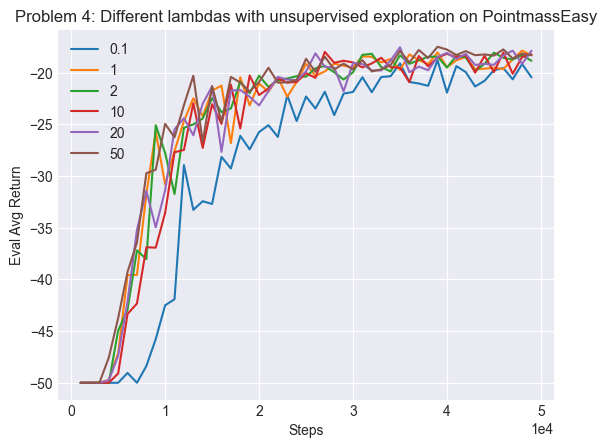

In [33]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(lam01, label="0.1")
plt.plot(lam1, label="1")
plt.plot(lam2, label="2")
plt.plot(lam10, label="10")
plt.plot(lam20, label="20")
plt.plot(lam50, label="50")
plt.legend()
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("Problem 4: Different lambdas with unsupervised exploration on PointmassEasy");
plt.savefig("report/q4_easy_unsupervised.jpg", dpi=600)

## Medium and supervised

In [34]:
root = os.path.join(os.getcwd(), "data")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if ("q4_awac_medium_supervised" in path and "events" in name)]

In [35]:
files

['c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_medium_supervised_lam0.1_PointmassMedium-v0_16-11-2022_20-40-43\\events.out.tfevents.1668631243.e2de39505594',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_medium_supervised_lam10_PointmassMedium-v0_16-11-2022_21-40-46\\events.out.tfevents.1668634846.e2de39505594',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_medium_supervised_lam1_PointmassMedium-v0_16-11-2022_21-00-43\\events.out.tfevents.1668632443.e2de39505594',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_medium_supervised_lam20_PointmassMedium-v0_16-11-2022_22-01-07\\events.out.tfevents.1668636067.e2de39505594',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_medium_supervised_lam2_PointmassMedium-v0_16-11-2022_21-20-48\\events.

In [36]:
lam01 = get_from_logfile(files[0], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam10 = get_from_logfile(files[1], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam1 = get_from_logfile(files[2], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam20 = get_from_logfile(files[3], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam2 = get_from_logfile(files[4], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam50 = get_from_logfile(files[5], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam01.set_index("Train_EnvstepsSoFar", inplace=True)
lam10.set_index("Train_EnvstepsSoFar", inplace=True)
lam1.set_index("Train_EnvstepsSoFar", inplace=True)
lam20.set_index("Train_EnvstepsSoFar", inplace=True)
lam2.set_index("Train_EnvstepsSoFar", inplace=True)
lam50.set_index("Train_EnvstepsSoFar", inplace=True)

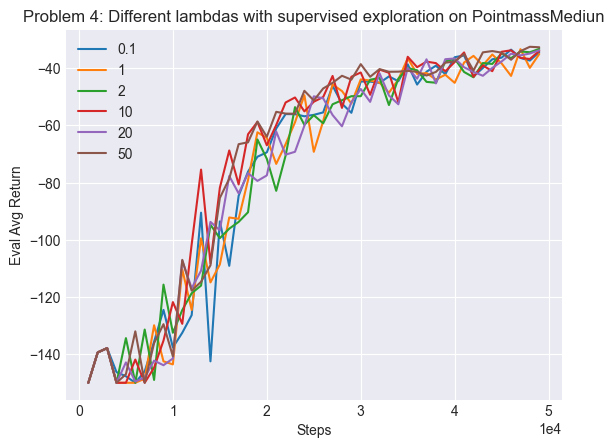

In [37]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(lam01, label="0.1")
plt.plot(lam1, label="1")
plt.plot(lam2, label="2")
plt.plot(lam10, label="10")
plt.plot(lam20, label="20")
plt.plot(lam50, label="50")
plt.legend()
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("Problem 4: Different lambdas with supervised exploration on PointmassMediun");
plt.savefig("report/q4_medium_supervised.jpg", dpi=600)

## Medium and unsupervised

In [38]:
root = os.path.join(os.getcwd(), "data")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if ("q4_awac_medium_unsupervised" in path and "events" in name)]

In [39]:
files

['c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_medium_unsupervised_lam0.1_PointmassMedium-v0_16-11-2022_18-42-00\\events.out.tfevents.1668624120.e2de39505594',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_medium_unsupervised_lam10_PointmassMedium-v0_16-11-2022_19-41-11\\events.out.tfevents.1668627671.e2de39505594',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_medium_unsupervised_lam1_PointmassMedium-v0_16-11-2022_19-02-05\\events.out.tfevents.1668625325.e2de39505594',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_medium_unsupervised_lam20_PointmassMedium-v0_16-11-2022_20-00-43\\events.out.tfevents.1668628843.e2de39505594',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q4_awac_medium_unsupervised_lam2_PointmassMedium-v0_16-11-2022_19-22-0

In [40]:
lam01 = get_from_logfile(files[0], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam10 = get_from_logfile(files[1], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam1 = get_from_logfile(files[2], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam20 = get_from_logfile(files[3], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam2 = get_from_logfile(files[4], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam50 = get_from_logfile(files[5], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
lam01.set_index("Train_EnvstepsSoFar", inplace=True)
lam10.set_index("Train_EnvstepsSoFar", inplace=True)
lam1.set_index("Train_EnvstepsSoFar", inplace=True)
lam20.set_index("Train_EnvstepsSoFar", inplace=True)
lam2.set_index("Train_EnvstepsSoFar", inplace=True)
lam50.set_index("Train_EnvstepsSoFar", inplace=True)

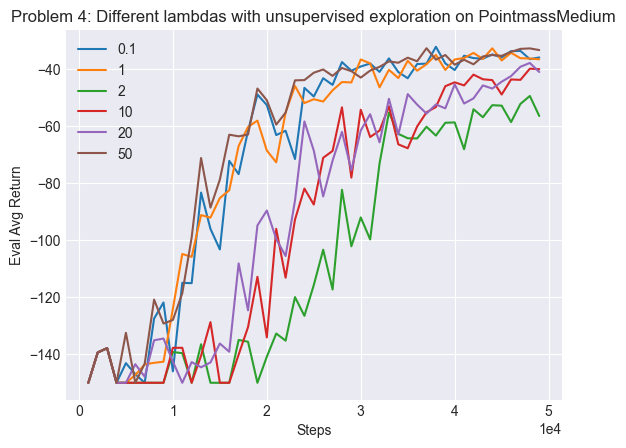

In [41]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(lam01, label="0.1")
plt.plot(lam1, label="1")
plt.plot(lam2, label="2")
plt.plot(lam10, label="10")
plt.plot(lam20, label="20")
plt.plot(lam50, label="50")
plt.legend()
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("Problem 4: Different lambdas with unsupervised exploration on PointmassMedium");
plt.savefig("report/q4_medium_unsupervised.jpg", dpi=600)

# Problem 5

## Easy and supervised

In [42]:
root = os.path.join(os.getcwd(), "data")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if ("q5_iql_easy_supervised" in path and "events" in name)]

In [43]:
files

['c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q5_iql_easy_supervised_lam10_tau0.5_PointmassEasy-v0_19-11-2022_02-42-13\\events.out.tfevents.1668825733.9b5dfb90f6a6',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q5_iql_easy_supervised_lam10_tau0.6_PointmassEasy-v0_19-11-2022_03-15-40\\events.out.tfevents.1668827740.9b5dfb90f6a6',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q5_iql_easy_supervised_lam10_tau0.7_PointmassEasy-v0_19-11-2022_03-50-08\\events.out.tfevents.1668829808.9b5dfb90f6a6',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q5_iql_easy_supervised_lam10_tau0.8_PointmassEasy-v0_19-11-2022_04-27-00\\events.out.tfevents.1668832020.9b5dfb90f6a6',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q5_iql_easy_supervised_lam10_tau0.95_PointmassEasy-v0_19-11-2022_05-39

In [44]:
tau05 = get_from_logfile(files[0], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
tau06 = get_from_logfile(files[1], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
tau07 = get_from_logfile(files[2], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
tau08 = get_from_logfile(files[3], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
tau095 = get_from_logfile(files[4], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
tau099 = get_from_logfile(files[5], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
tau09 = get_from_logfile(files[6], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
tau05.set_index("Train_EnvstepsSoFar", inplace=True)
tau06.set_index("Train_EnvstepsSoFar", inplace=True)
tau07.set_index("Train_EnvstepsSoFar", inplace=True)
tau08.set_index("Train_EnvstepsSoFar", inplace=True)
tau095.set_index("Train_EnvstepsSoFar", inplace=True)
tau099.set_index("Train_EnvstepsSoFar", inplace=True)
tau09.set_index("Train_EnvstepsSoFar", inplace=True)

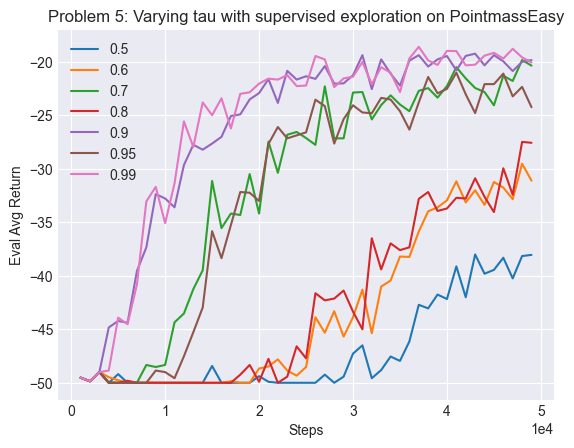

In [45]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(tau05, label="0.5")
plt.plot(tau06, label="0.6")
plt.plot(tau07, label="0.7")
plt.plot(tau08, label="0.8")
plt.plot(tau09, label="0.9")
plt.plot(tau095, label="0.95")
plt.plot(tau099, label="0.99")
plt.legend()
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("Problem 5: Varying tau with supervised exploration on PointmassEasy");
plt.savefig("report/q5_easy_supervised.jpg", dpi=600)

## Easy and unsupervised

In [46]:
root = os.path.join(os.getcwd(), "data")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if ("q5_iql_easy_unsupervised" in path and "events" in name)]

In [47]:
files

['c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q5_iql_easy_unsupervised_lam2_tau0.5_PointmassEasy-v0_19-11-2022_06-53-50\\events.out.tfevents.1668840830.9b5dfb90f6a6',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q5_iql_easy_unsupervised_lam2_tau0.6_PointmassEasy-v0_19-11-2022_07-31-04\\events.out.tfevents.1668843064.9b5dfb90f6a6',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q5_iql_easy_unsupervised_lam2_tau0.7_PointmassEasy-v0_19-11-2022_08-09-18\\events.out.tfevents.1668845358.9b5dfb90f6a6',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q5_iql_easy_unsupervised_lam2_tau0.8_PointmassEasy-v0_19-11-2022_08-45-57\\events.out.tfevents.1668847557.9b5dfb90f6a6',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q5_iql_easy_unsupervised_lam2_tau0.95_PointmassEasy-v0_19-11-2022_

In [48]:
tau05 = get_from_logfile(files[0], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
tau06 = get_from_logfile(files[1], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
tau07 = get_from_logfile(files[2], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
tau08 = get_from_logfile(files[3], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
tau095 = get_from_logfile(files[4], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
tau099 = get_from_logfile(files[5], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
tau09 = get_from_logfile(files[6], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
tau05.set_index("Train_EnvstepsSoFar", inplace=True)
tau06.set_index("Train_EnvstepsSoFar", inplace=True)
tau07.set_index("Train_EnvstepsSoFar", inplace=True)
tau08.set_index("Train_EnvstepsSoFar", inplace=True)
tau095.set_index("Train_EnvstepsSoFar", inplace=True)
tau099.set_index("Train_EnvstepsSoFar", inplace=True)
tau09.set_index("Train_EnvstepsSoFar", inplace=True)

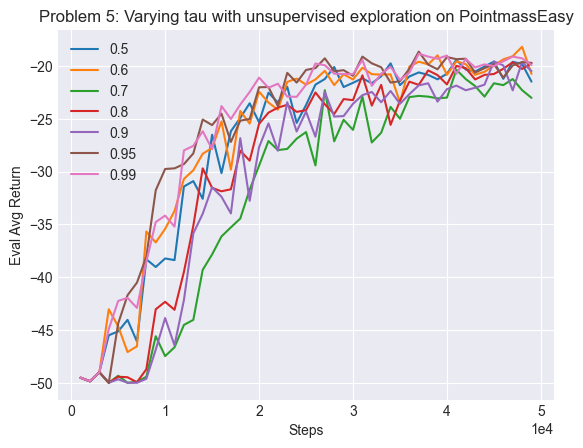

In [49]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(tau05, label="0.5")
plt.plot(tau06, label="0.6")
plt.plot(tau07, label="0.7")
plt.plot(tau08, label="0.8")
plt.plot(tau09, label="0.9")
plt.plot(tau095, label="0.95")
plt.plot(tau099, label="0.99")
plt.legend()
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("Problem 5: Varying tau with unsupervised exploration on PointmassEasy");
plt.savefig("report/q5_easy_unsupervised.jpg", dpi=600)

## Medium and supervised

In [50]:
root = os.path.join(os.getcwd(), "data")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if ("q5_iql_medium_supervised" in path and "events" in name)]

In [51]:
files

['c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q5_iql_medium_supervised_lam1_tau0.5_PointmassMedium-v0_20-11-2022_18-42-00\\events.out.tfevents.1668969720.dc55faff3e8b',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q5_iql_medium_supervised_lam1_tau0.6_PointmassMedium-v0_20-11-2022_19-13-08\\events.out.tfevents.1668971588.dc55faff3e8b',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q5_iql_medium_supervised_lam1_tau0.7_PointmassMedium-v0_20-11-2022_19-43-34\\events.out.tfevents.1668973414.dc55faff3e8b',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q5_iql_medium_supervised_lam1_tau0.8_PointmassMedium-v0_20-11-2022_20-14-18\\events.out.tfevents.1668975258.dc55faff3e8b',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q5_iql_medium_supervised_lam1_tau0.95_PointmassMedium-v0_2

In [52]:
tau05 = get_from_logfile(files[0], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
tau06 = get_from_logfile(files[1], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
tau07 = get_from_logfile(files[2], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
tau08 = get_from_logfile(files[3], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
tau095 = get_from_logfile(files[4], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
tau099 = get_from_logfile(files[5], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
tau09 = get_from_logfile(files[6], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
tau05.set_index("Train_EnvstepsSoFar", inplace=True)
tau06.set_index("Train_EnvstepsSoFar", inplace=True)
tau07.set_index("Train_EnvstepsSoFar", inplace=True)
tau08.set_index("Train_EnvstepsSoFar", inplace=True)
tau095.set_index("Train_EnvstepsSoFar", inplace=True)
tau099.set_index("Train_EnvstepsSoFar", inplace=True)
tau09.set_index("Train_EnvstepsSoFar", inplace=True)

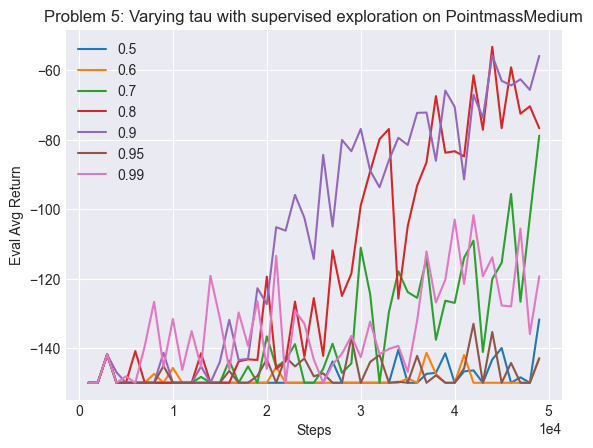

In [53]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(tau05, label="0.5")
plt.plot(tau06, label="0.6")
plt.plot(tau07, label="0.7")
plt.plot(tau08, label="0.8")
plt.plot(tau09, label="0.9")
plt.plot(tau095, label="0.95")
plt.plot(tau099, label="0.99")

plt.legend()
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("Problem 5: Varying tau with supervised exploration on PointmassMedium");
plt.savefig("report/q5_medium_supervised.jpg", dpi=600)

## Medium and unsupervised

In [54]:
root = os.path.join(os.getcwd(), "data")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if ("q5_iql_medium_unsupervised" in path and "events" in name)]

In [55]:
files

['c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q5_iql_medium_unsupervised_lam1_tau0.5_PointmassMedium-v0_20-11-2022_22-20-15\\events.out.tfevents.1668982815.dc55faff3e8b',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q5_iql_medium_unsupervised_lam1_tau0.6_PointmassMedium-v0_20-11-2022_22-51-49\\events.out.tfevents.1668984709.dc55faff3e8b',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q5_iql_medium_unsupervised_lam1_tau0.7_PointmassMedium-v0_20-11-2022_23-23-03\\events.out.tfevents.1668986583.dc55faff3e8b',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q5_iql_medium_unsupervised_lam1_tau0.8_PointmassMedium-v0_20-11-2022_23-53-32\\events.out.tfevents.1668988412.dc55faff3e8b',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw5\\data\\hw5_expl_q5_iql_medium_unsupervised_lam1_tau0.95_PointmassM

In [56]:
tau05 = get_from_logfile(files[0], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
tau06 = get_from_logfile(files[1], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
tau07 = get_from_logfile(files[2], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
tau08 = get_from_logfile(files[3], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
tau095 = get_from_logfile(files[4], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
tau099 = get_from_logfile(files[5], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
tau09 = get_from_logfile(files[6], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
tau05.set_index("Train_EnvstepsSoFar", inplace=True)
tau06.set_index("Train_EnvstepsSoFar", inplace=True)
tau07.set_index("Train_EnvstepsSoFar", inplace=True)
tau08.set_index("Train_EnvstepsSoFar", inplace=True)
tau095.set_index("Train_EnvstepsSoFar", inplace=True)
tau099.set_index("Train_EnvstepsSoFar", inplace=True)
tau09.set_index("Train_EnvstepsSoFar", inplace=True)

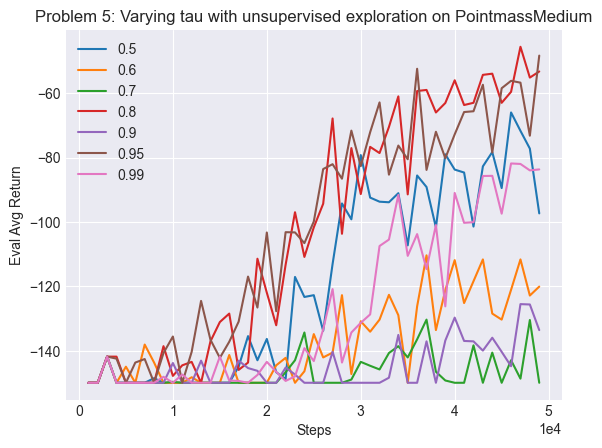

In [57]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(tau05, label="0.5")
plt.plot(tau06, label="0.6")
plt.plot(tau07, label="0.7")
plt.plot(tau08, label="0.8")
plt.plot(tau09, label="0.9")
plt.plot(tau095, label="0.95")
plt.plot(tau099, label="0.99")
plt.legend()
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("Problem 5: Varying tau with unsupervised exploration on PointmassMedium");
plt.savefig("report/q5_medium_unsupervised.jpg", dpi=600)

In [58]:
%tensorboard

UsageError: Line magic function `%tensorboard` not found.
